In [17]:
import pandas as pd
df=pd.read_csv("BTCUSD_Candlestick_15_M_ASK_05.08.2019-29.04.2022.csv")
df.head()
len(df)

95904

In [18]:
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df.set_index("Gmt time", inplace=True)
df=df[df.High!=df.Low]
len(df)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



84603

In [19]:
import pandas_ta as ta
df["VWAP"]=ta.vwap(df.High, df.Low, df.Close, df.Volume)
df["EMA"]=ta.ema(df.Close, length=100)
df.head()


Open   High    Low  Close   Volume          VWAP  EMA
Gmt time                                                                   
2019-08-05 00:00:00  11037  11104  11037  11087   8.0640  11076.000000  NaN
2019-08-05 00:15:00  11087  11110  11074  11099   6.9044  11084.456526  NaN
2019-08-05 00:30:00  11099  11172  11094  11166   7.1441  11103.693814  NaN
2019-08-05 00:45:00  11166  11288  11166  11273   8.3597  11141.727983  NaN
2019-08-05 01:00:00  11273  11308  11259  11271  10.4861  11176.957557  NaN

In [20]:
emasignal = [0]*len(df)
backcandles = 6

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if df.High[i]>=df.EMA[i]:
            dnt=0
        if df.Low[i]<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        #print("!!!!! check trend loop !!!!")
        emasignal[row]=3
    elif upt==1:
        emasignal[row]=2
    elif dnt==1:
        emasignal[row]=1

df['EMASignal'] = emasignal

In [21]:
VWAPsignal = [0]*len(df)
backcandles = 3

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if df.High[i]>=df.VWAP[i]:
            dnt=0
        if df.Low[i]<=df.VWAP[i]:
            upt=0
    if upt==1 and dnt==1:
        #print("!!!!! check trend loop !!!!")
        VWAPsignal[row]=3
    elif upt==1:
        VWAPsignal[row]=2
    elif dnt==1:
        VWAPsignal[row]=1

df['VWAPSignal'] = VWAPsignal
df.head()

Open   High    Low  Close   Volume          VWAP  EMA  \
Gmt time                                                                      
2019-08-05 00:00:00  11037  11104  11037  11087   8.0640  11076.000000  NaN   
2019-08-05 00:15:00  11087  11110  11074  11099   6.9044  11084.456526  NaN   
2019-08-05 00:30:00  11099  11172  11094  11166   7.1441  11103.693814  NaN   
2019-08-05 00:45:00  11166  11288  11166  11273   8.3597  11141.727983  NaN   
2019-08-05 01:00:00  11273  11308  11259  11271  10.4861  11176.957557  NaN   

                     EMASignal  VWAPSignal  
Gmt time                                    
2019-08-05 00:00:00          0           0  
2019-08-05 00:15:00          0           0  
2019-08-05 00:30:00          0           0  
2019-08-05 00:45:00          0           0  
2019-08-05 01:00:00          0           0

In [22]:
# myclosedistance = .01 * df['Close'][0]
# myclosedistance

In [23]:
def TotalSignal(l):
    myclosedistance = .015 * df['Close'][l]
    if (df.EMASignal[l]==2 and df.VWAPSignal[l]==2#and df.EngulfingSignal[l]==2 
        and min(abs(df.VWAP[l]-df.High[l]),abs(df.VWAP[l]-df.Low[l]))<=myclosedistance):
            return 2 #this is our trade signal showing that we're in an up trend and we got close enough to the EMA/VWAP line = long
    if (df.EMASignal[l]==1 and df.VWAPSignal[l]==1#and df.EngulfingSignal[l]==1 
        and min(abs(df.VWAP[l]-df.High[l]),abs(df.VWAP[l]-df.Low[l]))<=myclosedistance):
            return 1 #this is our trade signal showing that we're ina downtrend and we got close enough to the EMA/VWAP line = short
        
TotSignal = [0]*len(df)
for row in range(0, len(df)): #careful backcandles used previous cell
    TotSignal[row] = TotalSignal(row)
df['TotalSignal'] = TotSignal
df.head()

Open   High    Low  Close   Volume          VWAP  EMA  \
Gmt time                                                                      
2019-08-05 00:00:00  11037  11104  11037  11087   8.0640  11076.000000  NaN   
2019-08-05 00:15:00  11087  11110  11074  11099   6.9044  11084.456526  NaN   
2019-08-05 00:30:00  11099  11172  11094  11166   7.1441  11103.693814  NaN   
2019-08-05 00:45:00  11166  11288  11166  11273   8.3597  11141.727983  NaN   
2019-08-05 01:00:00  11273  11308  11259  11271  10.4861  11176.957557  NaN   

                     EMASignal  VWAPSignal  TotalSignal  
Gmt time                                                 
2019-08-05 00:00:00          0           0          NaN  
2019-08-05 00:15:00          0           0          NaN  
2019-08-05 00:30:00          0           0          NaN  
2019-08-05 00:45:00          0           0          NaN  
2019-08-05 01:00:00          0           0          NaN

In [24]:
import numpy as np
def pointposbreak(x):
    if x['TotalSignal']==1:
        return x['High']+1e-3
    elif x['TotalSignal']==2:
        return x['Low']-1e-3
    else:
        return np.nan

df['pointposbreak'] = df.apply(lambda row: pointposbreak(row), axis=1)

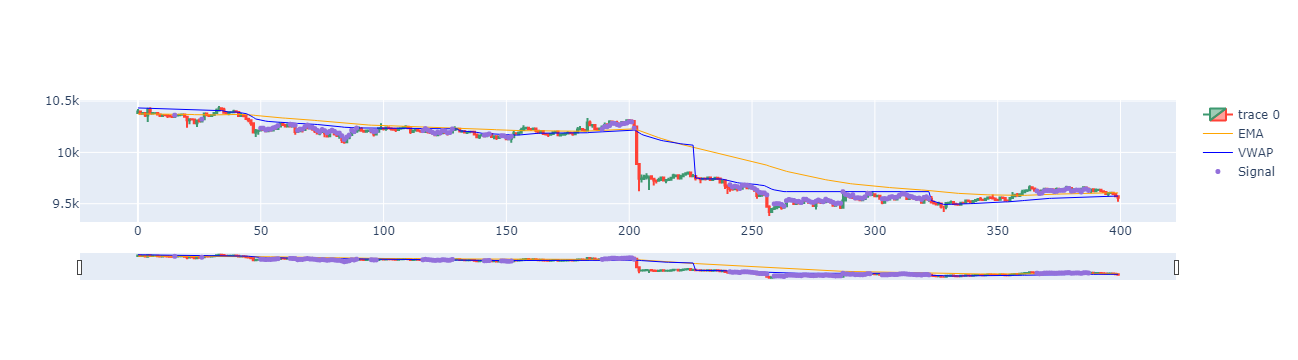

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

dfpl = df[1500:1900]
dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='orange', width=1), name="EMA"),
                go.Scatter(x=dfpl.index, y=dfpl.VWAP, line=dict(color='blue', width=1), name="VWAP")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [59]:
dfpl = df[:58379].copy()
dfpl.reset_index(inplace=True)
import pandas_ta as ta
dfpl['ATR']=ta.atr(dfpl.High, dfpl.Low, dfpl.Close, length=5)
#help(ta.atr)
def SIGNAL():
    return dfpl.TotalSignal

In [60]:
# class MyStrat(Strategy):
#     initsize = 0.33
#     mysize = initsize
#     def init(self):
#         super().init()
#         self.signal1 = self.I(SIGNAL)

#     def next(self):
#         super().next()
        
#         #if(self.signal1>0 and len(self.trades)==0 and len(self.closed_trades)>0 and self.closed_trades[-1].pl < 0):
#         #    self.mysize=self.mysize*2
#         #elif len(self.closed_trades)>0 and self.closed_trades[-1].pl > 0:
#         #    self.mysize=self.initsize

#         if self.signal1==2 and len(self.trades)==0:   
#             sl1 = self.data.Close[-1] - 40e-4
#             tp1 = self.data.Close[-1] + 40e-4
#             self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
#         elif self.signal1==1 and len(self.trades)==0:         
#             sl1 = self.data.Close[-1] + 40e-4
#             tp1 = self.data.Close[-1] - 40e-4
#             self.sell(sl=sl1, tp=tp1, size=self.mysize)

In [65]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.99
    mysize = initsize
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
      
        #martingale
        # if(self.signal1>0 and len(self.trades)==0 and len(self.closed_trades)>0 and self.closed_trades[-1].pl < 0):
        #     self.mysize=self.mysize*2
        # elif len(self.closed_trades)>0 and self.closed_trades[-1].pl > 0:
        #     self.mysize=self.initsize
            
        slatr = .8*self.data.ATR[-1]
        TPSLRatio = 2

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfpl, MyStrat, cash=10000, margin=1/8, commission=.0003)
stat = bt.run()
stat

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:33: UserWarning:

Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                   58378.0
Duration                              58378.0
Exposure Time [%]                   25.677041
Equity Final [$]                  3583.554972
Equity Peak [$]                  68555.968688
Return [%]                          -64.16445
Buy & Hold Return [%]              261.215838
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -94.772804
Avg. Drawdown [%]                  -10.300082
Max. Drawdown Duration                46450.0
Avg. Drawdown Duration            1093.150943
# Trades                               3511.0
Win Rate [%]                        37.254343
Best Trade [%]                       5.025959
Worst Trade [%]                     -5.576949
Avg. Trade [%]                    

In [62]:
bt.plot()

Row(id='8520', ...)